In [4]:
from ned import Net_moduls
import networkx as nx
import numpy as np

In [5]:
from nxviz.plots import CircosPlot

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Tehran Index DF and Tehran DF Normed Return 90 Far - 00 Far

In [7]:
tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [8]:
tehran_df_reg = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

In [9]:
tehran_index_99 = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed_newox.xlsx').set_index('date')

## Tehran DF Normed Return 90 Far - 98 Dey

In [10]:
tehran_df = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df = tehran_df[tehran_df.columns[:-12]].iloc[:-300]

## Tehran DF Normed Return 90 Far - 00 Far

In [11]:
tehran_df_completeDates = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df_completeDates = tehran_df_completeDates[tehran_df_completeDates.columns[:-12]]

In [130]:
tehran_df_TwoReg_Ox_1

,index,Brent Oil,Coin,Euro,USD,CPI,HOUSE,M1,M2,GDP,...,KanehayeGeyreFelezi,SarmayeGozari,Bank,SayerMali,HamlVaNaghl,Bimeh,Amlakva,Rayaneh,FaniVaMohandesi,Mali
date,,,,,,,,,,,,,,,,,,,,,
2011-04-03,1.589201,1.204279,-0.064676,0.003352,0.074196,0.254219,-0.085913,0.576463,0.006246,0.286208,...,0.160567,2.194912,0.133016,0.547947,-0.048002,0.505760,-0.499533,1.954830,1.634039,0.064607
2011-04-04,1.722932,0.469966,-0.064676,0.036767,0.167701,0.243984,-0.089951,0.541770,-0.009379,0.281797,...,0.469487,1.815934,0.198961,-0.136229,0.043659,-0.455818,0.011190,2.114426,1.645789,0.055551
2011-04-05,1.019755,0.042574,0.468825,0.601781,0.166654,0.233784,-0.093977,0.507324,-0.024956,0.277420,...,0.540526,0.457592,0.506722,-0.662255,0.141696,-0.570587,0.633858,-0.466934,1.052193,0.063312
2011-04-06,1.014672,0.230915,0.462820,0.593512,-0.067327,2.006361,0.406780,1.861511,1.285460,1.036407,...,0.025923,0.030873,0.260950,-1.065379,1.847740,-0.425628,0.496701,-1.418311,0.646754,0.023379
2011-04-09,-0.905728,0.229916,0.167874,0.099263,-0.020656,0.193316,-0.109980,0.371764,-0.086816,0.260230,...,-0.331206,-1.970878,-0.068564,-1.601712,0.582609,-0.154531,-0.217298,-1.027845,0.062933,-0.056198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13,0.998449,-0.089874,-0.626751,0.145095,-0.635281,-0.295096,0.432025,0.371062,0.725272,-0.032133,...,-0.418335,-0.190726,1.355833,-0.285347,-0.094256,-0.116494,-0.102902,-0.021539,0.212478,0.071590
2021-03-14,0.499740,-0.090086,0.241163,-0.056350,-0.067327,-0.299116,0.438806,0.374310,0.738386,-0.031753,...,-0.463479,-0.278258,0.241875,-0.219607,-0.234502,-0.145709,-0.087534,-0.635660,0.292574,0.003307
2021-03-15,2.410404,-0.409838,-0.064676,0.508198,0.309083,-0.303131,0.445527,0.377536,0.751411,-0.031373,...,-0.156443,-0.021304,1.787282,-0.318211,0.419687,0.242140,0.439195,0.181020,2.043409,0.127292


## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far 

In [12]:
tehran_df_TwoReg_Ox_1 = tehran_df_reg[tehran_df_reg['Ox_2']==0]
tehran_df_TwoReg_Ox_2 = tehran_df_reg[tehran_df_reg['Ox_2']==1]
tehran_df_TwoReg_Ox_1 = tehran_df_TwoReg_Ox_1[tehran_df_TwoReg_Ox_1.columns[:-12]]
tehran_df_TwoReg_Ox_2 = tehran_df_TwoReg_Ox_2[tehran_df_TwoReg_Ox_2.columns[:-12]]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey 

In [13]:
tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_2']==0]
tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_2']==1]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/2195039282.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_2']==0]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/2195039282.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_2']==1]


## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far / Same Length

In [14]:
max_length_TwoReg_Ox_2 = min(len(tehran_df_TwoReg_Ox_1), len(tehran_df_TwoReg_Ox_2))
tehran_df_TwoReg_Ox_1_same_length = tehran_df_TwoReg_Ox_1[-max_length_TwoReg_Ox_2:]
tehran_df_TwoReg_Ox_2_same_length = tehran_df_TwoReg_Ox_2[-max_length_TwoReg_Ox_2:]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [15]:
max_length_TwoReg_Ox_2_98 = min(len(tehran_df_TwoReg_Ox_1_98), len(tehran_df_TwoReg_Ox_2_98))
tehran_df_TwoReg_Ox_1_same_length_98 = tehran_df_TwoReg_Ox_1_98[-max_length_TwoReg_Ox_2_98:]
tehran_df_TwoReg_Ox_2_same_length_98 = tehran_df_TwoReg_Ox_2_98[-max_length_TwoReg_Ox_2_98:]

## Tehran Ox 2 1399 Regimed DF Normed Return 99 - 1400  

In [16]:
tehran_df_TwoReg_Ox_99_1 = tehran_df_reg[tehran_index_99['ox-2-1year']==0]
tehran_df_TwoReg_Ox_99_2 = tehran_df_reg[tehran_index_99['ox-2-1year']==1]
tehran_df_TwoReg_Ox_99_1 = tehran_df_TwoReg_Ox_99_1[tehran_df_TwoReg_Ox_99_1.columns[:-12]]
tehran_df_TwoReg_Ox_99_2 = tehran_df_TwoReg_Ox_99_2[tehran_df_TwoReg_Ox_99_2.columns[:-12]]

In [17]:
max_length_TwoReg_Ox_99_2 = min(len(tehran_df_TwoReg_Ox_99_1), len(tehran_df_TwoReg_Ox_99_2))
tehran_df_TwoReg_Ox_99_1_same_length = tehran_df_TwoReg_Ox_99_1[-max_length_TwoReg_Ox_99_2:]
tehran_df_TwoReg_Ox_99_2_same_length = tehran_df_TwoReg_Ox_99_2[-max_length_TwoReg_Ox_99_2:]

## Tehran Ox 3 Regimed DF Normed Return 90 Far - 98 Dey 

In [18]:
tehran_df_ThreeReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_3']==0]
tehran_df_ThreeReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_3']==1]
tehran_df_ThreeReg_Ox_3_98 = tehran_df[tehran_df_reg['Ox_3']==2]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3966413187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_3']==0]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3966413187.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_3']==1]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3966413187.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_Ox_3_98 = tehran_df[tehran_df_reg['Ox_3']==2]


## Tehran Ox 3 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [19]:
max_length_ThreeReg_Ox_90_98 = min(len(tehran_df_ThreeReg_Ox_1_98), len(tehran_df_ThreeReg_Ox_2_98),len(tehran_df_ThreeReg_Ox_3_98))
tehran_df_ThreeReg_Ox_1_same_length_98 = tehran_df_ThreeReg_Ox_1_98[-max_length_ThreeReg_Ox_90_98:]
tehran_df_ThreeReg_Ox_2_same_length_98 = tehran_df_ThreeReg_Ox_2_98[-max_length_ThreeReg_Ox_90_98:]
tehran_df_ThreeReg_Ox_3_same_length_98 = tehran_df_ThreeReg_Ox_3_98[-max_length_ThreeReg_Ox_90_98:]

## Tehran pn 3 Regimed DF Normed Return 90 Far - 98 Dey 

In [20]:
tehran_df_ThreeReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
tehran_df_ThreeReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
tehran_df_ThreeReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/1219616497.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/1219616497.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/1219616497.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]


## Tehran pn 3 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [21]:
max_length_ThreeReg_pn_90_98 = min(len(tehran_df_ThreeReg_pn_1_98), len(tehran_df_ThreeReg_pn_2_98),len(tehran_df_ThreeReg_pn_3_98))
tehran_df_ThreeReg_pn_1_same_length_98 = tehran_df_ThreeReg_pn_1_98[-max_length_ThreeReg_pn_90_98:]
tehran_df_ThreeReg_pn_2_same_length_98 = tehran_df_ThreeReg_pn_2_98[-max_length_ThreeReg_pn_90_98:]
tehran_df_ThreeReg_pn_3_same_length_98 = tehran_df_ThreeReg_pn_3_98[-max_length_ThreeReg_pn_90_98:]

## Tehran pn 6 Regimed DF Normed Return 90 Far - 98 Dey 

In [22]:
tehran_df_SixReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
tehran_df_SixReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
tehran_df_SixReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]
tehran_df_SixReg_pn_4_98 = tehran_df[tehran_df_reg['3_PN']==4]
tehran_df_SixReg_pn_5_98 = tehran_df[tehran_df_reg['3_PN']==5]
tehran_df_SixReg_pn_6_98 = tehran_df[tehran_df_reg['3_PN']==6]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3479540249.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_SixReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3479540249.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_SixReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3479540249.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_SixReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3479540249.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_SixReg_pn_4_98 = tehran_df[tehran_df_reg['3_PN']==4]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1608/3479540249.py:5: UserWarning: Boolean Series key

## Tehran pn 6 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [23]:
max_length_SixReg_pn_90_98 = min(len(tehran_df_SixReg_pn_1_98), len(tehran_df_SixReg_pn_2_98),len(tehran_df_SixReg_pn_3_98),\
                                  len(tehran_df_SixReg_pn_4_98), len(tehran_df_SixReg_pn_5_98),len(tehran_df_SixReg_pn_6_98))
tehran_df_SixReg_pn_1_same_length_98 = tehran_df_SixReg_pn_1_98[-max_length_SixReg_pn_90_98:]
tehran_df_SixReg_pn_2_same_length_98 = tehran_df_SixReg_pn_2_98[-max_length_SixReg_pn_90_98:]
tehran_df_SixReg_pn_3_same_length_98 = tehran_df_SixReg_pn_3_98[-max_length_SixReg_pn_90_98:]
tehran_df_SixReg_pn_4_same_length_98 = tehran_df_SixReg_pn_4_98[-max_length_SixReg_pn_90_98:]
tehran_df_SixReg_pn_5_same_length_98 = tehran_df_SixReg_pn_5_98[-max_length_SixReg_pn_90_98:]
tehran_df_SixReg_pn_6_same_length_98 = tehran_df_SixReg_pn_6_98[-max_length_SixReg_pn_90_98:]

In [25]:
nm = Net_moduls()

# 7) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [26]:
thr7_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98)
thr7_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98)
thr7 = min(thr7_1, thr7_2)

In [27]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98, method='pearson', threshold=thr7)

In [28]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.604831,626,0.800629,0.604831,0.009201,0.734194,1.404831


In [35]:
b7_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1_98))
b7_1 = np.array(dict(sorted(b7_1.items(), key=lambda item: item[1])))
b7_1

array({'DastgahayeBargi': 4, 'M1': 6, 'M2': 6, 'GDP': 7, 'USD': 8, 'Euro': 9, 'Gold': 9, 'AbzaralatePezeshki': 10, 'FaravardehayeNafti': 11, 'Coin': 11, 'HOUSE': 12, 'HamlVaNaghl': 14, 'Brent Oil': 20, 'Mansojat': 28, 'CPI': 31, 'VasayelErtebati': 31, 'paper': 32, 'Shimiyaee': 32, 'Rayaneh': 32, 'SayerMadan': 33, 'EntesharVaChap': 33, 'Lastic': 33, 'FaniVaMohandesi': 33, 'Mali': 33, 'Wood': 34, 'FelezateAsasi': 34, 'MashinAlat': 34, 'ChandReshteSanati': 34, 'KashiVaSeramik': 34, 'KanehayeGeyreFelezi': 34, 'Bank': 34, 'Agriculture': 35, 'CoalMining': 35, 'EstekrajeNaft': 35, 'khodrosazi': 35, 'GhandVaShekar': 35, 'GazaeeBejozGhand': 35, 'Siman': 35, 'SarmayeGozari': 35, 'Amlakva': 35, 'Daroee': 36, 'Bimeh': 36, 'index': 37, 'MahsolateFelezi': 37, 'MahsolateFelezi.1': 37, 'SayerMali': 38},
      dtype=object)

In [36]:
pearson_network_TwoReg_Ox_2_98 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98, method='pearson', threshold=thr7)

In [37]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.564251,584,0.754106,0.564251,0.010057,0.709932,1.442512


In [38]:
b7_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2_98))
b7_2 = np.array(dict(sorted(b7_2.items(), key=lambda item: item[1])))
b7_2

array({'FaravardehayeNafti': 4, 'HOUSE': 6, 'Brent Oil': 7, 'Mansojat': 8, 'M1': 9, 'M2': 12, 'Gold': 12, 'CoalMining': 13, 'GhandVaShekar': 13, 'GDP': 14, 'Euro': 14, 'CPI': 16, 'USD': 20, 'Coin': 21, 'Wood': 22, 'VasayelErtebati': 22, 'HamlVaNaghl': 22, 'Agriculture': 24, 'FelezateAsasi': 25, 'AbzaralatePezeshki': 25, 'ChandReshteSanati': 25, 'EntesharVaChap': 29, 'SayerMadan': 30, 'Bank': 30, 'KashiVaSeramik': 31, 'Bimeh': 31, 'MahsolateFelezi': 32, 'Lastic': 32, 'MahsolateFelezi.1': 32, 'GazaeeBejozGhand': 32, 'FaniVaMohandesi': 32, 'DastgahayeBargi': 33, 'Daroee': 33, 'paper': 34, 'KanehayeGeyreFelezi': 34, 'SarmayeGozari': 34, 'SayerMali': 34, 'Mali': 34, 'EstekrajeNaft': 35, 'Shimiyaee': 35, 'Siman': 35, 'MashinAlat': 36, 'khodrosazi': 36, 'Amlakva': 36, 'index': 37, 'Rayaneh': 37},
      dtype=object)

<Figure size 1600x1200 with 0 Axes>

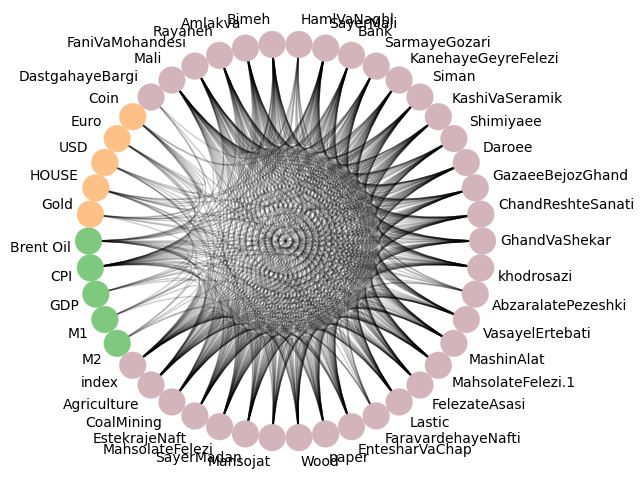

In [39]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_1_98)
circos.draw()

# 7.1) Tehran 2 Regime ox 1399 Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [40]:
thr7_99_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_99_1_same_length)
thr7_99_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_99_2_same_length)
thr7_99 = min(thr7_99_1, thr7_99_2)

In [64]:
thr7_99+=0.2

In [41]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_99_1 = nm.construct_network(tehran_df_TwoReg_Ox_99_1_same_length, method='pearson', threshold=thr7_99)

In [42]:
nm.get_network_features(pearson_network_TwoReg_Ox_99_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.614493,636,0.783304,0.614493,0.008937,0.737324,1.393237


In [46]:
b7_1_1 = dict(nx.degree(pearson_network_TwoReg_Ox_99_1))
b7_1_1 = np.array(dict(sorted(b7_1_1.items(), key=lambda item: item[1])))
b7_1_1

array({'AbzaralatePezeshki': 4, 'Brent Oil': 6, 'Mansojat': 6, 'CoalMining': 6, 'Gold': 8, 'GDP': 10, 'M1': 12, 'USD': 14, 'Coin': 14, 'Euro': 18, 'CPI': 20, 'M2': 22, 'FaravardehayeNafti': 23, 'VasayelErtebati': 24, 'HOUSE': 25, 'paper': 28, 'Wood': 29, 'khodrosazi': 31, 'HamlVaNaghl': 31, 'Bimeh': 31, 'Lastic': 32, 'Bank': 32, 'GhandVaShekar': 33, 'ChandReshteSanati': 33, 'FaniVaMohandesi': 33, 'EstekrajeNaft': 34, 'Mali': 34, 'Agriculture': 35, 'FelezateAsasi': 35, 'MashinAlat': 35, 'KashiVaSeramik': 35, 'Siman': 35, 'KanehayeGeyreFelezi': 35, 'SayerMali': 35, 'Rayaneh': 35, 'index': 36, 'MahsolateFelezi': 36, 'SayerMadan': 36, 'EntesharVaChap': 36, 'MahsolateFelezi.1': 36, 'DastgahayeBargi': 36, 'Shimiyaee': 36, 'SarmayeGozari': 36, 'Amlakva': 36, 'GazaeeBejozGhand': 37, 'Daroee': 38},
      dtype=object)

In [44]:
pearson_network_TwoReg_Ox_99_2 = nm.construct_network(tehran_df_TwoReg_Ox_99_2_same_length, method='pearson', threshold=thr7_99)

In [45]:
nm.get_network_features(pearson_network_TwoReg_Ox_99_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.540404,535,0.721311,0.540404,0.010876,0.695727,1.467677


In [47]:
b7_1_2 = dict(nx.degree(pearson_network_TwoReg_Ox_99_2))
b7_1_2 = np.array(dict(sorted(b7_1_2.items(), key=lambda item: item[1])))
b7_1_2

array({'Mali': 6, 'DastgahayeBargi': 7, 'HOUSE': 7, 'Coin': 8, 'GDP': 9, 'Mansojat': 9, 'Gold': 10, 'M2': 11, 'EntesharVaChap': 12, 'USD': 14, 'CoalMining': 15, 'Brent Oil': 16, 'Euro': 17, 'M1': 18, 'SayerMadan': 18, 'VasayelErtebati': 20, 'CPI': 24, 'Wood': 25, 'ChandReshteSanati': 26, 'EstekrajeNaft': 27, 'Lastic': 27, 'KanehayeGeyreFelezi': 28, 'SayerMali': 28, 'FaravardehayeNafti': 29, 'khodrosazi': 29, 'index': 30, 'MahsolateFelezi': 30, 'paper': 30, 'MahsolateFelezi.1': 30, 'Bimeh': 30, 'Rayaneh': 30, 'FaniVaMohandesi': 30, 'Agriculture': 31, 'GhandVaShekar': 31, 'Shimiyaee': 31, 'KashiVaSeramik': 31, 'SarmayeGozari': 31, 'Amlakva': 31, 'FelezateAsasi': 33, 'Siman': 33, 'Bank': 33, 'HamlVaNaghl': 33, 'MashinAlat': 34, 'GazaeeBejozGhand': 34, 'Daroee': 34},
      dtype=object)

# 8) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far

In [48]:
thr8_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr8_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr8 = min(thr8_1, thr8_2)

In [49]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='pearson', threshold=thr8)

In [50]:
nm.get_network_features(pearson_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.678261,702,0.83603,0.678261,0.00751,0.773094,1.330435


In [51]:
b8_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1))
b8_1 = np.array(dict(sorted(b8_1.items(), key=lambda item: item[1])))
b8_1

array({'DastgahayeBargi': 5, 'AbzaralatePezeshki': 7, 'M1': 8, 'Gold': 10, 'GDP': 10, 'M2': 11, 'Coin': 13, 'FaravardehayeNafti': 23, 'Euro': 24, 'Mali': 24, 'Brent Oil': 25, 'USD': 26, 'HOUSE': 26, 'CPI': 29, 'Mansojat': 29, 'HamlVaNaghl': 30, 'paper': 31, 'Wood': 33, 'CoalMining': 34, 'SayerMadan': 34, 'KashiVaSeramik': 34, 'FaniVaMohandesi': 34, 'EstekrajeNaft': 35, 'VasayelErtebati': 35, 'Agriculture': 36, 'Lastic': 36, 'MashinAlat': 36, 'SayerMali': 36, 'GazaeeBejozGhand': 37, 'Shimiyaee': 37, 'Siman': 37, 'Bank': 37, 'Bimeh': 37, 'MahsolateFelezi': 38, 'EntesharVaChap': 38, 'MahsolateFelezi.1': 38, 'GhandVaShekar': 38, 'ChandReshteSanati': 38, 'KanehayeGeyreFelezi': 38, 'Amlakva': 38, 'SarmayeGozari': 39, 'Rayaneh': 39, 'index': 40, 'khodrosazi': 40, 'Daroee': 40, 'FelezateAsasi': 41},
      dtype=object)

In [53]:
pearson_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='pearson', threshold=thr8)

In [54]:
nm.get_network_features(pearson_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.557488,577,0.742671,0.557488,0.01043,0.704084,1.458937


In [55]:
b8_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2))
b8_2 = np.array(dict(sorted(b8_2.items(), key=lambda item: item[1])))
b8_2

array({'FaravardehayeNafti': 5, 'Gold': 5, 'HOUSE': 6, 'Mansojat': 8, 'M1': 8, 'M2': 8, 'Brent Oil': 9, 'CoalMining': 13, 'GhandVaShekar': 13, 'GDP': 14, 'Coin': 14, 'CPI': 14, 'Euro': 18, 'USD': 19, 'Wood': 21, 'VasayelErtebati': 23, 'HamlVaNaghl': 23, 'Agriculture': 24, 'FelezateAsasi': 26, 'AbzaralatePezeshki': 26, 'ChandReshteSanati': 27, 'EntesharVaChap': 30, 'SayerMadan': 31, 'GazaeeBejozGhand': 31, 'Bank': 31, 'FaniVaMohandesi': 31, 'paper': 32, 'DastgahayeBargi': 32, 'Shimiyaee': 32, 'KashiVaSeramik': 32, 'Bimeh': 32, 'Rayaneh': 32, 'MahsolateFelezi': 33, 'Lastic': 33, 'MahsolateFelezi.1': 33, 'Daroee': 33, 'SarmayeGozari': 33, 'SayerMali': 34, 'MashinAlat': 35, 'Siman': 35, 'Mali': 35, 'index': 36, 'EstekrajeNaft': 36, 'khodrosazi': 36, 'KanehayeGeyreFelezi': 36, 'Amlakva': 36},
      dtype=object)

# 9) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [56]:
thr9_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr9_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr9 = min(thr7_1, thr7_2)

In [57]:
pearson_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='pearson', threshold=thr9)

In [58]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.847475,839,0.881767,0.847475,0.003547,0.876689,1.152525


In [59]:
b9_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1_98_last100))
b9_1 = np.array(dict(sorted(b9_1.items(), key=lambda item: item[1])))
b9_1

array({'USD': 21, 'Euro': 23, 'FaravardehayeNafti': 24, 'M2': 27, 'Brent Oil': 28, 'Coin': 28, 'Gold': 31, 'M1': 33, 'CoalMining': 33, 'DastgahayeBargi': 33, 'GDP': 36, 'khodrosazi': 36, 'HOUSE': 37, 'Mansojat': 37, 'Amlakva': 37, 'CPI': 38, 'Wood': 38, 'EntesharVaChap': 38, 'GhandVaShekar': 39, 'Agriculture': 40, 'MahsolateFelezi': 40, 'FelezateAsasi': 40, 'MahsolateFelezi.1': 40, 'ChandReshteSanati': 40, 'GazaeeBejozGhand': 40, 'Daroee': 40, 'Shimiyaee': 40, 'Siman': 40, 'Bank': 40, 'HamlVaNaghl': 40, 'Bimeh': 40, 'Rayaneh': 40, 'Mali': 40, 'EstekrajeNaft': 41, 'Lastic': 41, 'MashinAlat': 41, 'SayerMali': 41, 'index': 42, 'SayerMadan': 42, 'paper': 42, 'KashiVaSeramik': 42, 'KanehayeGeyreFelezi': 42, 'SarmayeGozari': 42, 'FaniVaMohandesi': 42, 'VasayelErtebati': 43},
      dtype=object)

In [60]:
pearson_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='pearson', threshold=thr9)

In [61]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.784848,777,0.823194,0.784848,0.005004,0.831308,1.215152


In [62]:
b9_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2_98_last100))
b9_2 = np.array(dict(sorted(b9_2.items(), key=lambda item: item[1])))
b9_2

array({'FaravardehayeNafti': 13, 'HOUSE': 22, 'Wood': 25, 'CoalMining': 26, 'Euro': 28, 'ChandReshteSanati': 29, 'Brent Oil': 29, 'Gold': 29, 'Agriculture': 30, 'FelezateAsasi': 30, 'CPI': 31, 'Mansojat': 31, 'VasayelErtebati': 31, 'GhandVaShekar': 33, 'M2': 34, 'paper': 34, 'Coin': 34, 'GDP': 35, 'FaniVaMohandesi': 35, 'USD': 35, 'Daroee': 36, 'Shimiyaee': 36, 'Bank': 36, 'Bimeh': 36, 'Mali': 36, 'M1': 37, 'EstekrajeNaft': 37, 'khodrosazi': 37, 'SayerMali': 37, 'HamlVaNaghl': 37, 'SayerMadan': 38, 'DastgahayeBargi': 38, 'Amlakva': 38, 'Rayaneh': 38, 'index': 39, 'MashinAlat': 39, 'EntesharVaChap': 40, 'Lastic': 40, 'KashiVaSeramik': 40, 'Siman': 40, 'KanehayeGeyreFelezi': 40, 'MahsolateFelezi': 41, 'MahsolateFelezi.1': 41, 'SarmayeGozari': 41, 'GazaeeBejozGhand': 42},
      dtype=object)

# 10) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [63]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column= tehran_df_reg['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.20285909264144628


In [64]:
pearson_network_TwoReg_Ox_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,3.000000,5.000000,0.513350,488.860000,0.799560,0.513350,0.011845,0.582131,1.670707
STDs,NaN,NaN,0.022554,13.540581,0.019251,0.022554,0.003131,0.036553,NaN
Means,2.553191,4.361702,0.240943,233.720000,0.510633,0.240943,0.024611,0.501912,2.039427
STDs,0.502538,0.528556,0.047070,50.018788,0.046928,0.047070,0.003874,0.042394,0.160699


# 10_1) Tehran 2 Regime ox 1399 Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [65]:
nm = Net_moduls()
pearson_network_TwoReg_Ox99_averged = nm.get_network_features_averaged_median(tehran_df[tehran_df.columns[:-1]][-243:], regimes_column= tehran_index_99['ox-2-1year'][-243:].values ,method='pearson',edges_threshold=200, target_window=100, target_length=18)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.2156576233721897


In [66]:
pearson_network_TwoReg_Ox99_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,3.0,5.111111,0.509954,479.500000,0.780155,0.509954,0.016253,0.632666,1.681009
STDs,0.0,0.323381,0.026027,15.886546,0.020510,0.026027,0.000669,0.012602,0.034457
Means,NaN,NaN,0.538989,475.111111,0.768570,0.538989,0.012316,0.622415,NaN
STDs,NaN,NaN,0.014346,4.013051,0.017663,0.014346,0.000992,0.012961,NaN


# 11) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [67]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.15959918978229293


In [68]:
pearson_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,3.380000,0.519691,537.880000,0.750899,0.519691,0.011832,0.680263,1.520599
STDs,0.0,0.490314,0.010347,10.708837,0.021172,0.010347,0.000481,0.008319,0.021177
Means,2.0,3.360000,0.337068,332.660000,0.555947,0.337068,0.017428,0.584544,1.747778
STDs,0.0,0.484873,0.055681,56.036653,0.059865,0.055681,0.002295,0.032273,0.096756


# 12) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far

In [69]:
thr12_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr12_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr12 = min(thr12_1, thr12_2)

In [70]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='entropy', threshold=thr12)

In [71]:
nm.get_network_features(entropy_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.814493,843,0.842888,0.814493,0.004216,0.850764,1.185507


In [72]:
b12_1 = dict(nx.degree(entropy_network_TwoReg_Ox_1))
b12_1 = np.array(dict(sorted(b12_1.items(), key=lambda item: item[1])))
b12_1

array({'M2': 21, 'HOUSE': 22, 'GDP': 26, 'CPI': 27, 'Gold': 27, 'Mansojat': 28, 'M1': 30, 'Amlakva': 32, 'GazaeeBejozGhand': 34, 'GhandVaShekar': 34, 'SarmayeGozari': 35, 'Bimeh': 35, 'USD': 36, 'SayerMali': 36, 'MashinAlat': 37, 'KanehayeGeyreFelezi': 37, 'paper': 37, 'index': 38, 'Euro': 38, 'Agriculture': 38, 'FelezateAsasi': 38, 'AbzaralatePezeshki': 38, 'ChandReshteSanati': 38, 'Daroee': 38, 'Brent Oil': 39, 'Coin': 39, 'SayerMadan': 39, 'EntesharVaChap': 39, 'DastgahayeBargi': 39, 'Shimiyaee': 39, 'KashiVaSeramik': 39, 'Mali': 39, 'VasayelErtebati': 39, 'khodrosazi': 39, 'EstekrajeNaft': 40, 'HamlVaNaghl': 40, 'CoalMining': 41, 'MahsolateFelezi': 41, 'MahsolateFelezi.1': 41, 'Rayaneh': 41, 'FaniVaMohandesi': 41, 'Wood': 42, 'FaravardehayeNafti': 42, 'Siman': 42, 'Bank': 42, 'Lastic': 43},
      dtype=object)

In [74]:
entropy_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='entropy', threshold=thr12)

In [75]:
nm.get_network_features(entropy_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.7343,760,0.742784,0.7343,0.006039,0.793597,1.2657


In [76]:
b12_2 = dict(nx.degree(entropy_network_TwoReg_Ox_2))
b12_2 = np.array(dict(sorted(b12_2.items(), key=lambda item: item[1])))
b12_2

array({'GhandVaShekar': 22, 'GazaeeBejozGhand': 27, 'MahsolateFelezi': 27, 'MahsolateFelezi.1': 27, 'VasayelErtebati': 28, 'Brent Oil': 28, 'Bank': 30, 'M1': 30, 'AbzaralatePezeshki': 30, 'KashiVaSeramik': 30, 'KanehayeGeyreFelezi': 30, 'Euro': 31, 'GDP': 31, 'paper': 31, 'Wood': 31, 'Rayaneh': 31, 'Coin': 32, 'khodrosazi': 32, 'Mali': 32, 'M2': 32, 'EntesharVaChap': 33, 'SarmayeGozari': 33, 'CoalMining': 33, 'EstekrajeNaft': 33, 'CPI': 33, 'Siman': 33, 'SayerMadan': 34, 'Amlakva': 34, 'index': 35, 'USD': 35, 'Mansojat': 35, 'SayerMali': 35, 'HamlVaNaghl': 35, 'HOUSE': 36, 'FaravardehayeNafti': 36, 'DastgahayeBargi': 36, 'Shimiyaee': 36, 'Bimeh': 36, 'Gold': 36, 'FaniVaMohandesi': 37, 'Agriculture': 38, 'Lastic': 38, 'FelezateAsasi': 38, 'MashinAlat': 38, 'ChandReshteSanati': 41, 'Daroee': 41},
      dtype=object)

# 12.1) Tehran 2 Regime ox 1399 Entropy (Based on Median Threshold)

In [80]:
thr12_99_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_99_1_same_length)
thr12_99_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_99_2_same_length)
thr12_99 = min(thr12_99_1, thr12_99_2)

In [81]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_99_1 = nm.construct_network(tehran_df_TwoReg_Ox_99_1_same_length, method='entropy', threshold=thr12_99)

In [82]:
nm.get_network_features(entropy_network_TwoReg_Ox_99_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.690821,715,0.751345,0.690821,0.007027,0.772909,1.309179


In [83]:
b12_1_1 = dict(nx.degree(entropy_network_TwoReg_Ox_99_1))
b12_1_1 = np.array(dict(sorted(b12_1_1.items(), key=lambda item: item[1])))
b12_1_1

array({'AbzaralatePezeshki': 8, 'GhandVaShekar': 19, 'Euro': 19, 'M1': 20, 'GDP': 20, 'Mansojat': 20, 'M2': 21, 'Gold': 24, 'CPI': 24, 'USD': 25, 'SayerMadan': 28, 'EstekrajeNaft': 28, 'HamlVaNaghl': 29, 'Coin': 29, 'khodrosazi': 30, 'Bank': 30, 'HOUSE': 31, 'CoalMining': 32, 'Wood': 32, 'DastgahayeBargi': 32, 'paper': 33, 'Daroee': 33, 'FaniVaMohandesi': 33, 'index': 34, 'Agriculture': 34, 'Siman': 34, 'Bimeh': 34, 'VasayelErtebati': 34, 'FaravardehayeNafti': 35, 'MashinAlat': 35, 'SayerMali': 35, 'ChandReshteSanati': 36, 'KashiVaSeramik': 36, 'KanehayeGeyreFelezi': 36, 'Amlakva': 36, 'Mali': 36, 'Brent Oil': 36, 'MahsolateFelezi': 36, 'MahsolateFelezi.1': 36, 'Lastic': 37, 'GazaeeBejozGhand': 37, 'Rayaneh': 38, 'EntesharVaChap': 38, 'SarmayeGozari': 39, 'FelezateAsasi': 39, 'Shimiyaee': 39},
      dtype=object)

In [84]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_99_2 = nm.construct_network(tehran_df_TwoReg_Ox_99_2_same_length, method='entropy', threshold=thr12_99)

In [85]:
nm.get_network_features(entropy_network_TwoReg_Ox_99_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.739394,732,0.783059,0.739394,0.006061,0.801149,1.260606


In [86]:
b12_1_2 = dict(nx.degree(entropy_network_TwoReg_Ox_99_2))
b12_1_2 = np.array(dict(sorted(b12_1_2.items(), key=lambda item: item[1])))
b12_1_2

array({'Mansojat': 19, 'Brent Oil': 20, 'FaravardehayeNafti': 22, 'Coin': 23, 'Euro': 23, 'FelezateAsasi': 24, 'HOUSE': 25, 'KashiVaSeramik': 26, 'USD': 28, 'Wood': 28, 'Bank': 29, 'M1': 30, 'paper': 30, 'Lastic': 30, 'M2': 30, 'GDP': 31, 'CPI': 32, 'Shimiyaee': 32, 'FaniVaMohandesi': 32, 'SayerMadan': 33, 'VasayelErtebati': 33, 'EntesharVaChap': 33, 'GazaeeBejozGhand': 34, 'Daroee': 34, 'Bimeh': 34, 'Gold': 34, 'GhandVaShekar': 34, 'ChandReshteSanati': 35, 'index': 36, 'Agriculture': 36, 'SarmayeGozari': 36, 'CoalMining': 37, 'EstekrajeNaft': 37, 'khodrosazi': 37, 'MashinAlat': 38, 'DastgahayeBargi': 38, 'SayerMali': 38, 'Mali': 38, 'MahsolateFelezi': 39, 'MahsolateFelezi.1': 39, 'Siman': 39, 'KanehayeGeyreFelezi': 39, 'Amlakva': 39, 'Rayaneh': 39, 'HamlVaNaghl': 41},
      dtype=object)

# 13) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [90]:
thr13_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr13_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr13 = min(thr13_1, thr13_2)

In [91]:
entropy_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='entropy', threshold=thr13)

In [92]:
nm.get_network_features(entropy_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.789899,782,0.809717,0.789899,0.004886,0.832214,1.210101


In [93]:
b13_1 = dict(nx.degree(entropy_network_TwoReg_Ox_1_98_last100))
b13_1 = np.array(dict(sorted(b13_1.items(), key=lambda item: item[1])))
b13_1

array({'CPI': 23, 'Coin': 24, 'Gold': 26, 'Brent Oil': 27, 'USD': 27, 'Euro': 30, 'M2': 30, 'HOUSE': 31, 'M1': 31, 'khodrosazi': 31, 'FelezateAsasi': 31, 'GDP': 32, 'CoalMining': 32, 'SarmayeGozari': 32, 'index': 33, 'Mansojat': 34, 'ChandReshteSanati': 34, 'Bank': 34, 'Mali': 34, 'paper': 35, 'SayerMali': 35, 'EntesharVaChap': 35, 'Daroee': 36, 'Agriculture': 36, 'Lastic': 37, 'FaniVaMohandesi': 37, 'Shimiyaee': 37, 'Siman': 37, 'FaravardehayeNafti': 38, 'DastgahayeBargi': 38, 'HamlVaNaghl': 38, 'MahsolateFelezi': 38, 'MahsolateFelezi.1': 38, 'GazaeeBejozGhand': 38, 'KanehayeGeyreFelezi': 38, 'Amlakva': 38, 'EstekrajeNaft': 38, 'Rayaneh': 38, 'Bimeh': 39, 'SayerMadan': 40, 'Wood': 40, 'GhandVaShekar': 40, 'KashiVaSeramik': 40, 'MashinAlat': 42, 'VasayelErtebati': 42},
      dtype=object)

In [94]:
entropy_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='entropy', threshold=thr13)

In [95]:
nm.get_network_features(entropy_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.717172,710,0.754899,0.717172,0.006577,0.786319,1.282828


In [96]:
b13_2 = dict(nx.degree(entropy_network_TwoReg_Ox_2_98_last100))
b13_2 = np.array(dict(sorted(b13_2.items(), key=lambda item: item[1])))
b13_2

array({'CoalMining': 20, 'index': 22, 'GDP': 24, 'FaravardehayeNafti': 24, 'Coin': 25, 'USD': 25, 'CPI': 27, 'Mali': 27, 'MahsolateFelezi': 27, 'MahsolateFelezi.1': 27, 'VasayelErtebati': 27, 'KanehayeGeyreFelezi': 28, 'Lastic': 28, 'GhandVaShekar': 29, 'Bank': 29, 'Bimeh': 29, 'GazaeeBejozGhand': 29, 'KashiVaSeramik': 29, 'Euro': 30, 'EstekrajeNaft': 30, 'HamlVaNaghl': 30, 'ChandReshteSanati': 31, 'Gold': 32, 'Wood': 32, 'SayerMali': 32, 'Mansojat': 33, 'EntesharVaChap': 33, 'FaniVaMohandesi': 33, 'Brent Oil': 34, 'M1': 34, 'Amlakva': 34, 'Rayaneh': 34, 'Shimiyaee': 35, 'HOUSE': 35, 'khodrosazi': 36, 'DastgahayeBargi': 36, 'M2': 37, 'SarmayeGozari': 37, 'Agriculture': 37, 'SayerMadan': 37, 'paper': 38, 'Daroee': 39, 'Siman': 40, 'FelezateAsasi': 42, 'MashinAlat': 43},
      dtype=object)

# 14) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [97]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.02817851828822495


In [98]:
entropy_network_TwoReg_Ox_90_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.0,0.635980,629.620000,0.684656,0.635980,0.008466,0.741185,1.364020
STDs,0.0,0.0,0.045367,44.913472,0.043756,0.045367,0.001055,0.024061,0.045367
Means,2.0,2.0,0.628061,621.780000,0.672236,0.628061,0.008650,0.734783,1.371939
STDs,0.0,0.0,0.025591,25.335536,0.024614,0.025591,0.000595,0.014328,0.025591


# 15) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [99]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.024496417514484746


In [100]:
entropy_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.000000,2.020000,0.651014,673.800000,0.701393,0.651014,0.007932,0.747845,1.349005
STDs,0.000000,0.141421,0.024928,25.800649,0.023097,0.024928,0.000567,0.014259,0.024942
Means,1.960000,2.000000,0.734303,726.960000,0.761284,0.734303,0.006179,0.796156,1.265697
STDs,0.197949,0.000000,0.031045,30.734518,0.029001,0.031045,0.000722,0.019616,0.031045


# 16) Tehran 2 Regime Crossed (Based on Median Threshold) Period of 90 Far - 00 Far

In [101]:
thr16_1 = nm.find_median_crossed_threshold(tehran_df_TwoReg_Ox_99_1_same_length)
thr16_2 = nm.find_median_crossed_threshold(tehran_df_TwoReg_Ox_99_2_same_length)
thr16 = min(thr16_1, thr16_2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [102]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='crossed', threshold=thr16)

In [103]:
nm.get_network_features(crossed_network_TwoReg_Ox_1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [104]:
b16_1 = dict(nx.degree(crossed_network_TwoReg_Ox_1))
b16_1 = np.array(dict(sorted(b16_1.items(), key=lambda item: item[1])))
b16_1

array({}, dtype=object)

In [105]:
crossed_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='crossed', threshold=thr16)

In [106]:
nm.get_network_features(crossed_network_TwoReg_Ox_2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [107]:
b16_2 = dict(nx.degree(crossed_network_TwoReg_Ox_2))
b16_2 = np.array(dict(sorted(b16_2.items(), key=lambda item: item[1])))
b16_2

array({}, dtype=object)

# 16.1) Tehran 2 Regime ox 1399 Crossed (Based on Median Threshold)

In [108]:
thr16_99_1 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_99_1_same_length)
thr16_99_2 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_99_2_same_length)
thr16_99 = min(thr16_99_1, thr16_99_2)

In [109]:
thr16_99 

0.44

Please Be careful about the type of Crossed Network Construction Used in the code!

In [110]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_99_1 = nm.construct_network(tehran_df_TwoReg_Ox_99_1_same_length, method='crossed_100', threshold=thr16_99)

In [111]:
nm.get_network_features(crossed_network_TwoReg_Ox_99_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.396135,410,0.479887,0.396135,0.013724,0.632603,1.603865


In [113]:
b16_1_1 = dict(nx.degree(crossed_network_TwoReg_Ox_99_1))
b16_1_1 = np.array(dict(sorted(b16_1_1.items(), key=lambda item: item[1])))
b16_1_1

array({'Rayaneh': 9, 'MahsolateFelezi': 10, 'MahsolateFelezi.1': 10, 'SarmayeGozari': 10, 'SayerMali': 10, 'Bimeh': 10, 'Mali': 10, 'EntesharVaChap': 11, 'Amlakva': 11, 'Daroee': 12, 'KanehayeGeyreFelezi': 12, 'ChandReshteSanati': 12, 'Siman': 12, 'Lastic': 12, 'FelezateAsasi': 12, 'index': 13, 'CoalMining': 13, 'GazaeeBejozGhand': 13, 'MashinAlat': 13, 'KashiVaSeramik': 13, 'Shimiyaee': 13, 'Agriculture': 14, 'FaniVaMohandesi': 14, 'DastgahayeBargi': 14, 'Coin': 15, 'EstekrajeNaft': 15, 'paper': 15, 'Bank': 15, 'HamlVaNaghl': 15, 'GhandVaShekar': 18, 'khodrosazi': 18, 'SayerMadan': 19, 'Wood': 22, 'FaravardehayeNafti': 22, 'Euro': 25, 'VasayelErtebati': 26, 'GDP': 26, 'USD': 27, 'AbzaralatePezeshki': 27, 'CPI': 31, 'HOUSE': 31, 'Mansojat': 31, 'Brent Oil': 32, 'M2': 34, 'Gold': 35, 'M1': 38},
      dtype=object)

In [114]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_99_2 = nm.construct_network(tehran_df_TwoReg_Ox_99_2_same_length, method='crossed_100', threshold=thr16_99)

In [115]:
nm.get_network_features(crossed_network_TwoReg_Ox_99_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.33913,351,0.458633,0.33913,0.015042,0.609002,1.661836


In [116]:
b16_1_2 = dict(nx.degree(crossed_network_TwoReg_Ox_99_2))
b16_1_2 = np.array(dict(sorted(b16_1_2.items(), key=lambda item: item[1])))
b16_1_2

array({'GazaeeBejozGhand': 6, 'MahsolateFelezi': 6, 'MahsolateFelezi.1': 6, 'index': 7, 'Amlakva': 7, 'SayerMadan': 8, 'FaniVaMohandesi': 8, 'MashinAlat': 8, 'Lastic': 9, 'SarmayeGozari': 9, 'HamlVaNaghl': 9, 'Siman': 10, 'Rayaneh': 10, 'Bimeh': 10, 'Shimiyaee': 11, 'Agriculture': 11, 'khodrosazi': 11, 'Daroee': 11, 'GhandVaShekar': 12, 'ChandReshteSanati': 12, 'SayerMali': 12, 'Bank': 13, 'CoalMining': 14, 'KanehayeGeyreFelezi': 14, 'USD': 14, 'Gold': 15, 'FaravardehayeNafti': 15, 'Euro': 15, 'Brent Oil': 16, 'FelezateAsasi': 16, 'Mansojat': 17, 'DastgahayeBargi': 17, 'Wood': 18, 'KashiVaSeramik': 18, 'EstekrajeNaft': 20, 'EntesharVaChap': 21, 'paper': 21, 'Coin': 21, 'VasayelErtebati': 22, 'Mali': 22, 'M1': 24, 'AbzaralatePezeshki': 25, 'HOUSE': 26, 'M2': 31, 'GDP': 34, 'CPI': 40},
      dtype=object)

# 17) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [117]:
thr17_1 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr17_2 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr17 = min(thr17_1, thr17_2)

In [120]:
crossed_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='crossed_100', threshold=thr17)

In [121]:
nm.get_network_features(crossed_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.289855,300,0.478793,0.289855,0.01614,0.594283,1.710145


In [122]:
b17_1 = dict(nx.degree(crossed_network_TwoReg_Ox_1_98_last100))
b17_1 = np.array(dict(sorted(b17_1.items(), key=lambda item: item[1])))
b17_1

array({'FaniVaMohandesi': 4, 'index': 5, 'Lastic': 5, 'MashinAlat': 5, 'SayerMali': 5, 'Daroee': 6, 'GazaeeBejozGhand': 6, 'Mali': 6, 'GhandVaShekar': 6, 'Bimeh': 6, 'CoalMining': 7, 'SarmayeGozari': 7, 'HamlVaNaghl': 7, 'FelezateAsasi': 7, 'KashiVaSeramik': 7, 'Shimiyaee': 8, 'MahsolateFelezi': 8, 'MahsolateFelezi.1': 8, 'EntesharVaChap': 9, 'Amlakva': 9, 'Rayaneh': 9, 'Agriculture': 9, 'Siman': 9, 'KanehayeGeyreFelezi': 9, 'Wood': 10, 'khodrosazi': 10, 'Bank': 10, 'ChandReshteSanati': 11, 'SayerMadan': 11, 'HOUSE': 12, 'EstekrajeNaft': 13, 'CPI': 14, 'paper': 14, 'VasayelErtebati': 15, 'Brent Oil': 17, 'Mansojat': 18, 'Gold': 19, 'Coin': 23, 'FaravardehayeNafti': 23, 'DastgahayeBargi': 23, 'Euro': 25, 'AbzaralatePezeshki': 26, 'USD': 29, 'M1': 36, 'GDP': 37, 'M2': 37},
      dtype=object)

In [123]:
crossed_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='crossed_100', threshold=thr17)

In [124]:
nm.get_network_features(crossed_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.373913,387,0.428446,0.373913,0.014273,0.619156,1.628019


In [125]:
b17_2 = dict(nx.degree(crossed_network_TwoReg_Ox_2_98_last100))
b17_2 = np.array(dict(sorted(b17_2.items(), key=lambda item: item[1])))
b17_2

array({'index': 6, 'Daroee': 6, 'HamlVaNaghl': 8, 'Lastic': 9, 'GazaeeBejozGhand': 10, 'Amlakva': 10, 'MashinAlat': 11, 'FaniVaMohandesi': 11, 'MahsolateFelezi': 11, 'MahsolateFelezi.1': 11, 'Siman': 11, 'KanehayeGeyreFelezi': 12, 'EntesharVaChap': 14, 'KashiVaSeramik': 14, 'M2': 14, 'Bimeh': 14, 'ChandReshteSanati': 14, 'Shimiyaee': 15, 'SayerMali': 15, 'AbzaralatePezeshki': 15, 'Mali': 15, 'EstekrajeNaft': 16, 'DastgahayeBargi': 16, 'khodrosazi': 16, 'Mansojat': 17, 'M1': 17, 'SayerMadan': 17, 'GhandVaShekar': 17, 'SarmayeGozari': 17, 'CoalMining': 17, 'Rayaneh': 17, 'FelezateAsasi': 18, 'HOUSE': 19, 'Agriculture': 19, 'FaravardehayeNafti': 20, 'Bank': 21, 'CPI': 22, 'paper': 23, 'VasayelErtebati': 23, 'Wood': 24, 'Gold': 25, 'GDP': 27, 'Brent Oil': 28, 'Coin': 30, 'Euro': 30, 'USD': 32},
      dtype=object)

# 18) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [126]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='crossed_100',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.52


In [127]:
crossed_network_TwoReg_Ox_90_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.680000,0.309159,319.980000,0.471515,0.309159,0.015861,0.598473,1.697874
STDs,0.0,0.471212,0.035287,36.522003,0.037849,0.035287,0.000992,0.015393,0.043654
Means,2.0,2.060000,0.485662,502.660000,0.501777,0.485662,0.011691,0.664598,1.514396
STDs,0.0,0.239898,0.028591,29.591511,0.023935,0.028591,0.000653,0.012079,0.028746


# 19) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [128]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='crossed_100',edges_threshold=200, \
                                                                                  target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.52


In [129]:
crossed_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.620000,0.310860,321.740000,0.422901,0.310860,0.015767,0.599073,1.693758
STDs,0.0,0.490314,0.023116,23.924891,0.039456,0.023116,0.000625,0.010043,0.027521
Means,2.0,2.060000,0.485662,502.660000,0.501777,0.485662,0.011691,0.664598,1.514396
STDs,0.0,0.239898,0.028591,29.591511,0.023935,0.028591,0.000653,0.012079,0.028746
